<a href="https://colab.research.google.com/github/anvithakp/ML-Google-Colab/blob/master/k_means_clustering_scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means Clustering is a simple yet powerful algorithm in data science
There are a plethora of real-world applications of K-Means Clustering (a few of which we will cover here)
This comprehensive guide will introduce you to the world of clustering and K-Means Clustering along with an implementation in Python on a real-world datase

Importing the data from Drive

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset4.csv to dataset4.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['dataset4.csv']))

Visualizing the data

In [ ]:
data.head()

,Price,Age
0,132500,42
1,181115,0
2,109000,133
3,155000,13
4,86060,0


In [ ]:
print(data.iloc[0])

Price    132500
Age          42
Name: 0, dtype: int64


# Data Cleaning

Removing rows with Non numeric values, if any

In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
data.describe()

,Price,Age
count,1728.000000,1728.000000
mean,211966.705440,27.916088
std,98441.391015,29.209988
min,5000.000000,0.000000
25%,145000.000000,13.000000
50%,189900.000000,19.000000
75%,259000.000000,34.000000
max,775000.000000,225.000000


Now, we are standardizing the data due to a huge difference in the magnitudes of house age and price

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

pd.DataFrame(scaled_data).describe()

,0,1
count,1.728000e+03,1.728000e+03
mean,-9.136210e-17,6.347803e-17
std,1.000289e+00,1.000289e+00
min,-2.103044e+00,-9.559802e-01
25%,-6.804667e-01,-5.107981e-01
50%,-2.242257e-01,-3.053294e-01
75%,4.779180e-01,2.083422e-01
max,5.721133e+00,6.749094e+00


# K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)
y_kmeans = kmeans.predict(scaled_data)

plotting the data:

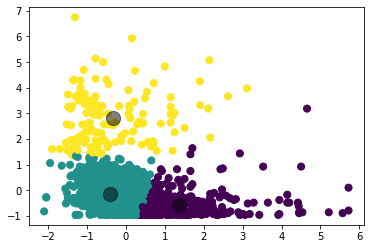

In [ ]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=y_kmeans, s=50, cmap='rainbow')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('House Age')
plt.ylabel('House Price')
plt.show()

From the above graph we can clearly visualize the clusters. We can see that almost all the older houses clearly sell at lower price points.

Majority of the newer homes sell at low to medium price points.whereas some of the newer homes are sold at higher price points. The reason for this might be the difference in the amenities,neighbourhood or other factors when gone through the dataset.

Therefore the clusters can be categorized as : Old houses cluster, new homes with better facilities /amenities /neighbourhood cluster and new homes with poor facilities /amenities /neighbourhood cluster.

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,  n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()